In [58]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as ssn

In [59]:
#read day.csv file and store it in bike_rental
bike_rental=pd.read_csv('day.csv')

#Initial Data Analysis

In [60]:
bike_rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


##Observations:
Most of the columns are integer and few are float type.

In [61]:
bike_rental.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [62]:
bike_rental.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##Observations:
There are no null values in any columns

In [63]:
bike_rental.shape

(730, 16)

##Observations:
16 Columns and 730 rows.

Check for duplicates in rows

In [64]:
bike_rental_duplicate=bike_rental[:][:]
bike_rental_duplicate.shape

(730, 16)

In [65]:
bike_rental_duplicate.drop_duplicates(inplace=True)
bike_rental_duplicate.shape

(730, 16)

##Observations:
There are no dulplicate rows.

In [66]:
#Renaming some columns for better understanding

bike_rental.rename(columns={'hum':'humidity','cnt':'count','yr':'year'},inplace=True)

In [67]:
bike_rental.head()

,instant,dteday,season,year,mnth,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


##Observations:
We can drop some of the columns like instant as it is just a index value, 
dteday- As we have year and month columns separately this becomes a reduntant column.
We can also remove casual and registered columns as the total count is present in another column. And since we are interested in predicting the total count and not the separate ones we can drop these 2.
Drop Holiday column also as the information is also present in working day column


In [68]:
Cols_To_Drop=['instant','dteday','casual','registered','holiday']
bike_rental.drop(Cols_To_Drop,axis=1,inplace=True)
bike_rental.shape

(730, 11)

##Observations: Mapping Categorical Values to required columns
Need to convert columns which have numeric values but actually categorical because if we leave them as integer values this will impact our model as it will treat them as ordered numerical values.
Columns that need to be converted are season,mnth,weathersit,weekday. 

In [69]:
bike_rental['season']=bike_rental['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
bike_rental['mnth']=bike_rental['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike_rental['weekday']=bike_rental['weekday'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
bike_rental['weathersit']=bike_rental['weathersit'].map({1:'Clear Weather',2:'Cloudy',3:'Light Rain',4:'Heavy Rain'})

#EDA

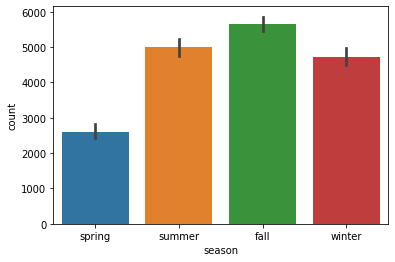

In [70]:
#Categorical Variables
ssn.barplot(x='season',y='count',data=bike_rental)
plt.show()

##Observations:
Highest number bike rentals happened in Fall and least in spring.

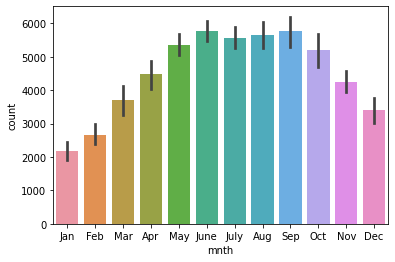

In [71]:
ssn.barplot(x='mnth',y='count',data=bike_rental)
plt.show()

##Observations:
June and September months have observed the maximum number of rentals.

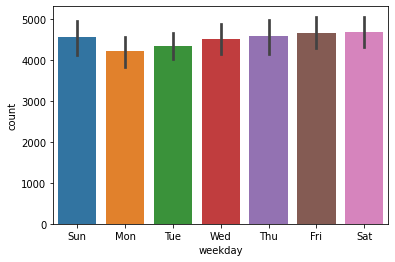

In [72]:
ssn.barplot(x='weekday',y='count',data=bike_rental)
plt.show()

##Observations:
All weeek days have the same number of rentals.

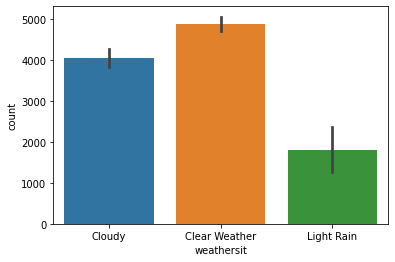

In [73]:
ssn.barplot(x='weathersit',y='count',data=bike_rental)
plt.show()

##Observations:
--No bike rentals during heavy snow fall or rain.
--Most of the rentals are during cloudy or clear weather.

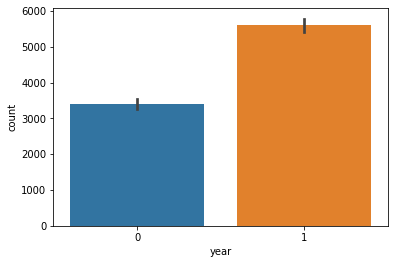

In [74]:
ssn.barplot(x='year',y='count',data=bike_rental)
plt.show()

##Observations:
We can see that rentals are increasing wth passing years.So popularity is increasing

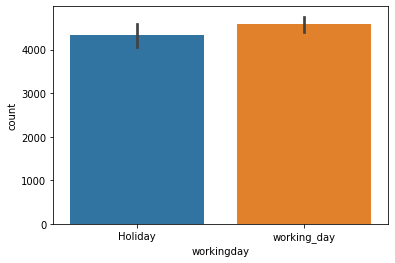

In [75]:
#Lets map 0 and 1 to holiday and working days
bike_rental['workingday']=bike_rental['workingday'].map({1:'working_day',0:'Holiday'})
ssn.barplot(x='workingday',y='count',data=bike_rental)
plt.show()

##Observations:
Bike Rentals are more weekdays.

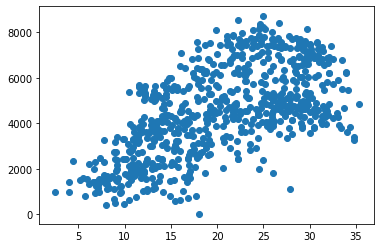

In [76]:
plt.scatter('temp','count',data=bike_rental)
plt.show()

##Observations:
Not linear but with increase in temperature we can see increase in number of rentals

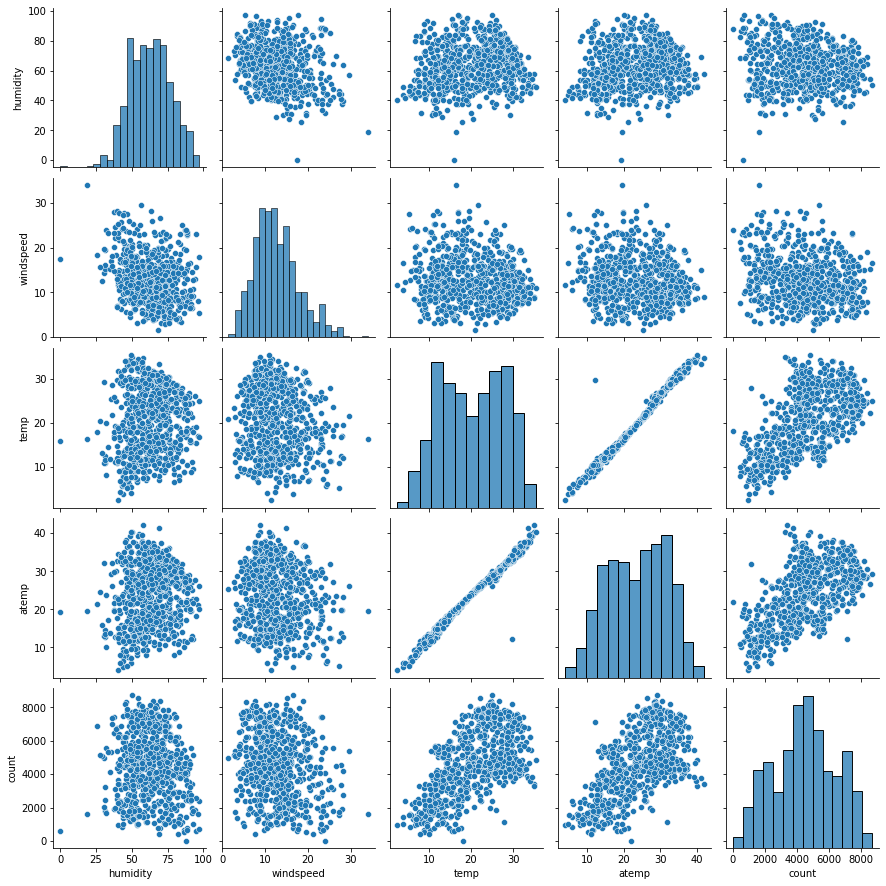

In [77]:
ssn.pairplot(bike_rental[['humidity', 'windspeed','temp', 'atemp','count']])
plt.show()

##Observations:
With Count(Bike Rentals)-

temp- Increase in temperature bike rentals also increase.

atemp- rentals increase with the feeling in temperature increase.

humidity- rentals are there when humidity is between 50 and 100. 

WindSpeed- Its again highly scattered but less wind speed more rentals.

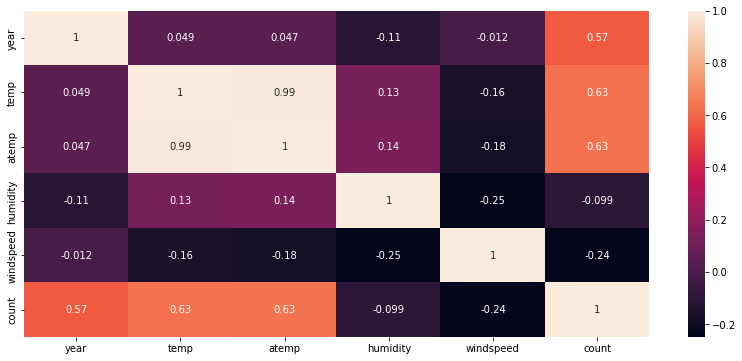

In [78]:
plt.figure(figsize=(14,6))
ssn.heatmap(bike_rental.corr(),annot=True)
plt.show()

##Observations:
As we can see temp and atemp are very highly correlated. We can drop atemp.

In [79]:
bike_rental.drop('atemp',axis=1,inplace=True)

In [80]:
bike_rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   mnth        730 non-null    object 
 3   weekday     730 non-null    object 
 4   workingday  730 non-null    object 
 5   weathersit  730 non-null    object 
 6   temp        730 non-null    float64
 7   humidity    730 non-null    float64
 8   windspeed   730 non-null    float64
 9   count       730 non-null    int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 57.2+ KB


In order to use the categorical values in model predicton lets convert the categorical columns using get_dummies from pandas to multiple columns containing 0 and 1 combinations.(Using Label encoding is not feasable here as it will just again convert into numerical values and we will run again into the same problem. We can use one hot encoding also but we need drop the extra column as it just adds up the multi collinearity issue later on)

In [81]:
Cols_To_Convert=['season','mnth','weekday','weathersit','workingday']
bike_rental=pd.get_dummies(bike_rental,drop_first=True)

In [82]:
bike_rental.shape

(730, 28)

In [83]:
#split the data
from sklearn.model_selection import train_test_split

Now we have completed the data cleaning and initial analysis. Lets split the data into test and training sets. Since we have 730 rows lets split in the ratio of 70:30(train to test).
Import the required libraries for splitting.

In [84]:
bike_rental_train,bike_rental_test=train_test_split(bike_rental,train_size=0.7,random_state=100)

In [85]:
print(bike_rental_train.shape)
print(bike_rental_test.shape)

(510, 28)
(220, 28)


In [86]:
bike_rental_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    510 non-null    int64  
 1   temp                    510 non-null    float64
 2   humidity                510 non-null    float64
 3   windspeed               510 non-null    float64
 4   count                   510 non-null    int64  
 5   season_spring           510 non-null    uint8  
 6   season_summer           510 non-null    uint8  
 7   season_winter           510 non-null    uint8  
 8   mnth_Aug                510 non-null    uint8  
 9   mnth_Dec                510 non-null    uint8  
 10  mnth_Feb                510 non-null    uint8  
 11  mnth_Jan                510 non-null    uint8  
 12  mnth_July               510 non-null    uint8  
 13  mnth_June               510 non-null    uint8  
 14  mnth_Mar                510 non-null    

Lets scale the columns temp,humidity,windspeed using MinMaxScaler.
Scaling makes the columns to same level wrt other columns. This helps in better understatnding of the coefficients obtained from the model.

In [87]:
from sklearn.preprocessing import MinMaxScaler

In [88]:
scaler=MinMaxScaler()
Cols_To_Scale=['temp','humidity','windspeed']
bike_rental_train[Cols_To_Scale]=scaler.fit_transform(bike_rental_train[Cols_To_Scale])
print(bike_rental_train.head())

     year      temp  ...  weathersit_Cloudy  weathersit_Light Rain
576     1  0.815169  ...                  0                      0
426     1  0.442393  ...                  1                      0
728     1  0.245101  ...                  0                      0
482     1  0.395666  ...                  1                      0
111     0  0.345824  ...                  1                      0

[5 rows x 28 columns]


In [89]:
# Get x_train columns and y_train columns
x_train,y_train=bike_rental_train,bike_rental_train.pop('count')

In [90]:
print(y_train.head())

576    7216
426    4066
728    1796
482    4220
111    1683
Name: count, dtype: int64


#Model Building

Since we have around 28 columns that can be used for predicting lets use RFE to elimate the unnecessary columns. We will reduce the number of columns to 13 using RFE then we will manually remove the columns depending on VIF and p values

In [91]:
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [92]:
lr=LinearRegression()

rfe=RFE(lr,n_features_to_select=13)
rfe_model=rfe.fit(x_train,y_train)

In [93]:
print(rfe_model.support_)           
print(rfe_model.ranking_)  

[ True  True  True  True  True False  True False False False False  True
 False False False False False  True  True False  True False False False
  True  True  True]
[ 1  1  1  1  1  2  1  8  5  6  3  1 13 15  7  4 12  1  1 11  1 14  9 10
  1  1  1]


Lets remove all the columns which are false in rfe_model.support_

In [94]:
Cols_From_RFE=x_train.columns[rfe_model.support_]
print(Cols_From_RFE)

Index(['year', 'temp', 'humidity', 'windspeed', 'season_spring',
       'season_winter', 'mnth_July', 'mnth_Sep', 'weekday_Mon', 'weekday_Sun',
       'workingday_working_day', 'weathersit_Cloudy', 'weathersit_Light Rain'],
      dtype='object')


In [95]:
x_train_rfe=x_train[Cols_From_RFE]

We need to identify the correlation of one column wrt all other columns. And we will do this by using VIF. If VIF>5 we need to remove that column and we will remove using this. 

We need to remove one column at a time as removing one will reduce the VIF in all other also.

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [97]:
vif=pd.DataFrame()
vif['features']=x_train_rfe.columns
vif['vif']=[variance_inflation_factor(x_train_rfe.values,i) for i in range(x_train_rfe.shape[1])]
vif['vif']=round(vif['vif'],2)
vif=vif.sort_values(by='vif',ascending=False)
vif

,features,vif
2,humidity,29.19
1,temp,17.25
10,workingday_working_day,16.91
9,weekday_Sun,4.57
3,windspeed,4.52
8,weekday_Mon,4.45
4,season_spring,2.79
11,weathersit_Cloudy,2.28
5,season_winter,2.14
0,year,2.08


In [98]:
x_train_rfe_sm=sm.add_constant(x_train_rfe)
lr=sm.OLS(y_train,x_train_rfe_sm)
lr_model=lr.fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          9.38e-190
Time:                        16:57:03   Log-Likelihood:                -4114.9
No. Observations:                 510   AIC:                             8258.
Df Residuals:                     496   BIC:                             8317.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2069

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


##Observations:
lets remove a column which has high VIF value - Humidity.

In [99]:
x_train_rfe.drop('humidity',axis=1,inplace=True)
x_train_rfe_sm=sm.add_constant(x_train_rfe)
lr=sm.OLS(y_train,x_train_rfe_sm)
lr_model=lr.fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.3
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          1.26e-187
Time:                        16:57:04   Log-Likelihood:                -4122.7
No. Observations:                 510   AIC:                             8271.
Df Residuals:                     497   BIC:                             8326.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1372

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [100]:
vif=pd.DataFrame()
vif['features']=x_train_rfe.columns
vif['vif']=[variance_inflation_factor(x_train_rfe.values,i) for i in range(x_train_rfe.shape[1])]
vif['vif']=round(vif['vif'],2)
vif=vif.sort_values(by='vif',ascending=False)
print(vif)

                  features    vif
9   workingday_working_day  13.12
1                     temp  12.38
2                windspeed   4.48
8              weekday_Sun   3.77
7              weekday_Mon   3.54
3            season_spring   2.44
0                     year   2.07
4            season_winter   1.78
10       weathersit_Cloudy   1.58
5                mnth_July   1.37
6                 mnth_Sep   1.20
11   weathersit_Light Rain   1.09


##Observation:
Since workingday_working_day has vif 13.12 lets remove it.

In [101]:
x_train_rfe.drop('workingday_working_day',axis=1,inplace=True)
x_train_rfe_sm=sm.add_constant(x_train_rfe)
lr=sm.OLS(y_train,x_train_rfe_sm)
lr_model=lr.fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     225.6
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          1.84e-185
Time:                        16:57:04   Log-Likelihood:                -4130.7
No. Observations:                 510   AIC:                             8285.
Df Residuals:                     498   BIC:                             8336.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2245.28

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [102]:
vif=pd.DataFrame()
vif['features']=x_train_rfe.columns
vif['vif']=[variance_inflation_factor(x_train_rfe.values,i) for i in range(x_train_rfe.shape[1])]
vif['vif']=round(vif['vif'],2)
vif=vif.sort_values(by='vif',ascending=False)
print(vif)

                 features   vif
1                    temp  4.72
2               windspeed  4.04
0                    year  2.06
3           season_spring  1.66
9       weathersit_Cloudy  1.52
4           season_winter  1.41
5               mnth_July  1.35
8             weekday_Sun  1.22
7             weekday_Mon  1.21
6                mnth_Sep  1.20
10  weathersit_Light Rain  1.08


##Observation:
Since weekday_Sun has p value 0.184 which means it is in significant so, lets remove it.

In [103]:
x_train_rfe.drop('weekday_Sun',axis=1,inplace=True)
x_train_rfe_sm=sm.add_constant(x_train_rfe)
lr=sm.OLS(y_train,x_train_rfe_sm)
lr_model=lr.fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          2.75e-186
Time:                        16:57:04   Log-Likelihood:                -4131.6
No. Observations:                 510   AIC:                             8285.
Df Residuals:                     499   BIC:                             8332.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2269.67

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [104]:
vif=pd.DataFrame()
vif['features']=x_train_rfe.columns
vif['vif']=[variance_inflation_factor(x_train_rfe.values,i) for i in range(x_train_rfe.shape[1])]
vif['vif']=round(vif['vif'],2)
vif=vif.sort_values(by='vif',ascending=False)
print(vif)

                features   vif
1                   temp  4.67
2              windspeed  4.00
0                   year  2.06
3          season_spring  1.64
8      weathersit_Cloudy  1.52
4          season_winter  1.40
5              mnth_July  1.35
6               mnth_Sep  1.20
7            weekday_Mon  1.17
9  weathersit_Light Rain  1.08


#Observations:
As all p values are nearly 0(means all are highy significant) and VIF of all columns are less than 5, we can conclude this as our final model.

##Lets predict the y values and plot the residuals 

In [105]:
y_train_pred=lr_model.predict(x_train_rfe_sm)
residual=y_train-y_train_pred

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


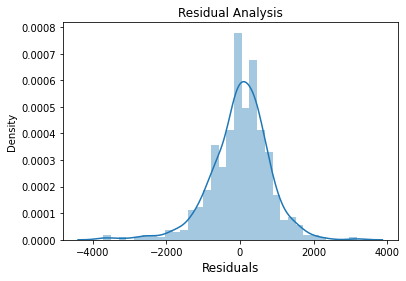

In [106]:
fig=ssn.distplot(residual)
fig.set_title('Residual Analysis',fontsize=12)
plt.xlabel('Residuals',fontsize=12)
plt.show()

##Observations:
We can see that residuals(error terms) are normally distributed with mean zero.

In [107]:
x_test,y_test=bike_rental_test,bike_rental_test.pop('count')

In [108]:
#scale the test data
Cols_To_Scale=['temp','humidity','windspeed']
x_test[Cols_To_Scale]=scaler.transform(x_test[Cols_To_Scale])
x_test.head()

,year,temp,humidity,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_working_day,weathersit_Cloudy,weathersit_Light Rain
184,0,0.831783,0.657364,0.084219,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
535,1,0.901354,0.610133,0.153728,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
299,0,0.511964,0.837699,0.334206,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0
221,0,0.881625,0.437098,0.339570,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
152,0,0.817246,0.314298,0.537414,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [109]:
#predicting against x_test values
x_test=x_test[x_train_rfe.columns]
x_test=sm.add_constant(x_test)
y_test_pred=lr_model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#Calculating the r2_score

In [110]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_test_pred))

0.8091992919519853


#Conclusions:
--r2_score on test data is 80.9 and R square values on the model is 83.2. Since the difference is very less we can say this is a good model.

-- With the R2 values we can conclud there is no overfit or underfit of the model

-- temperature,year,winter,september are positively correlated means with increase in this(or during these periods) the bike rentals also increase

-- windspeed,spring,Monday,july,light rain and cloudy are negatively correlated means with increase in this(or during these periods) the bike rentals decrease.

